# Grupo 3
**Participantes:**<br><br>
Daniel Moreira<br>
Lia Morimoto<br>
Ryan Ferreira<br>
Thiago Figueira

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wave
import IPython
from scipy.io import wavfile

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Sobre os dados:

Em todos esses 3 áudios há 2 instrumentos tocando e 1 ruído contínuo.

## Importando as ondas sonoras:

In [2]:
#Abrindo os 3 áudios.
mix1 = wave.open(r"ICA mix 1.wav")
mix2 = wave.open(r"ICA mix 2.wav")
mix3 = wave.open(r"ICA mix 3.wav")

In [3]:
mix1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [4]:
mix1.getparams().nframes/mix1.getparams().framerate

5.998072562358277

## Transformando os arquivos de áudio em áudio de fato:
* No formato atual que esses arquivos de áudio estão eles não são áudios.

In [5]:
signal1 = mix1.readframes(-1)
signal2 = mix2.readframes(-1)
signal3 = mix3.readframes(-1)

Esses sinais são strings gigantescas, é interessante transformá-las em arrays:

In [6]:
audio1 = np.fromstring(signal1, 'Int16')
audio2 = np.fromstring(signal2, 'Int16')
audio3 = np.fromstring(signal3, 'Int16')

<ipython-input-6-59bd8ec6509d>:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  audio1 = np.fromstring(signal1, 'Int16')
<ipython-input-6-59bd8ec6509d>:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  audio1 = np.fromstring(signal1, 'Int16')
<ipython-input-6-59bd8ec6509d>:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  audio2 = np.fromstring(signal2, 'Int16')
<ipython-input-6-59bd8ec6509d>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  audio2 = np.fromstring(signal2, 'Int16')
<ipython-input-6-59bd8ec6509d>:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  audio3 = np.fromstring(signal3, 'Int16')
<ipython-input-6-59bd8ec6509d>:3: Depr

In [7]:
# Cada frame do áudio se torna um dado numérico.
audio1

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

In [8]:
# vai criar aproximadamente 24000 frames dentro de 5.9 segundos
time = np.linspace(0, len(audio1)/mix1.getparams().framerate, len(audio1))

## Visualizando os sons:

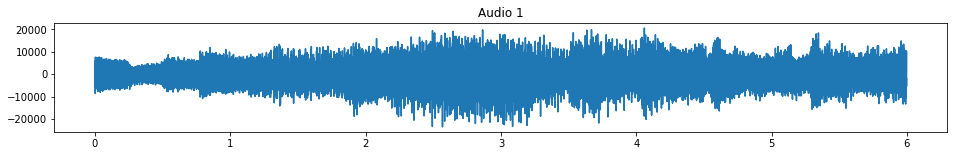

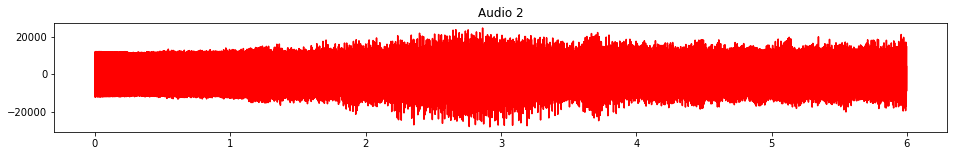

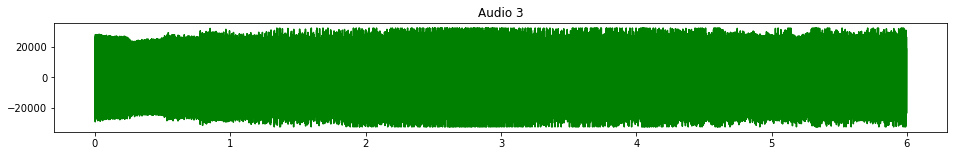

In [9]:
plt.figure(figsize=(16,2))
plt.title('Audio 1')
plt.plot(time, audio1)
plt.show()

plt.figure(figsize=(16,2))
plt.title('Audio 2')
plt.plot(time, audio2, c='r')
plt.show()

plt.figure(figsize=(16,2))
plt.title('Audio 3')
plt.plot(time, audio3, c='g')
plt.show()

## Tocando os sons:

In [10]:
IPython.display.Audio('ICA mix 1.wav')

In [11]:
IPython.display.Audio('ICA mix 2.wav')

In [12]:
IPython.display.Audio('ICA mix 3.wav')

# Normalizando:

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = pd.DataFrame([audio1, audio2, audio3]).T

In [15]:
X.head()

0     1     2
0   879   157   879
1  1268   899  2584
2  1460  1610  4081
3  1756  2325  5682
4  1943  3022  7147

In [16]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

# Aplicando o ICA:

In [17]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)

ica_X = ica.fit_transform(X_scaled)

In [18]:
ica_X

array([[-1.59963061e-05, -7.22179129e-06, -6.53762780e-04],
       [-1.90634837e-04, -5.15502173e-06, -7.10744142e-04],
       [-3.59615014e-04, -8.86836308e-06, -6.13425198e-04],
       ...,
       [-1.92664583e-03, -2.74501636e-03, -3.95584715e-04],
       [-2.04881534e-03, -2.80408737e-03, -4.06482935e-04],
       [-2.16405815e-03, -2.84493914e-03, -5.35338949e-04]])

In [19]:
song1 = ica_X[:, 0]
song2 = ica_X[:, 1]
song3 = ica_X[:, 2]

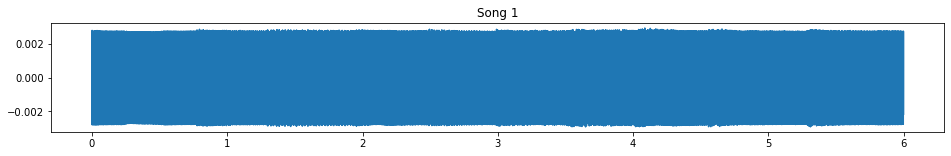

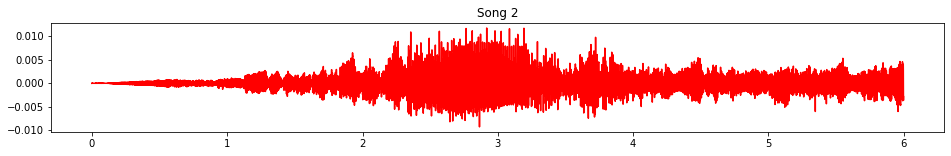

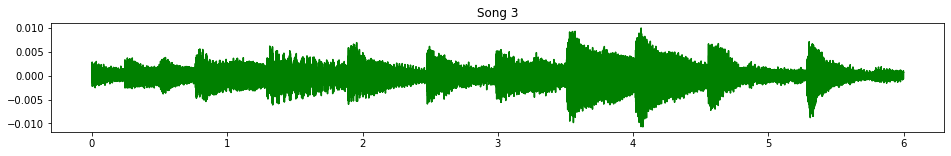

In [20]:
plt.figure(figsize=(16,2))
plt.title('Song 1')
plt.plot(time, song1)
plt.show()

plt.figure(figsize=(16,2))
plt.title('Song 2')
plt.plot(time, song2, c='r')
plt.show()

plt.figure(figsize=(16,2))
plt.title('Song 3')
plt.plot(time, song3, c='g')
plt.show()

In [21]:
r1 = np.int16(song1*100*50000)
r2 = np.int16(song2*100*50000)
r3 = np.int16(song3*100*50000)


# Writing wave files
wavfile.write("res1.wav", mix1.getparams().framerate, r1)
wavfile.write("res2.wav", mix2.getparams().framerate, r2)
wavfile.write("res3.wav", mix3.getparams().framerate, r3)

In [22]:
IPython.display.Audio("./res1.wav")

In [23]:
IPython.display.Audio("./res2.wav")

Só tem ruído, não tocar:

In [24]:
IPython.display.Audio("./res3.wav")